#### PRELIMINARIES - IMPORT LIBRARIES

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage import io, color
from sklearn import decomposition
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### PRELIMINARIES - IMPORT PERCEPTUAL COLORMAPS

In [2]:
_magma_data = np.load('magma.npy')
_inferno_data = np.load('inferno.npy')
_plasma_data = np.load('plasma.npy')
_viridis_data = np.load('viridis.npy')


cmaps = {}
for (name, data) in (('magma', _magma_data),
                     ('inferno', _inferno_data),
                     ('plasma', _plasma_data),
                     ('viridis', _viridis_data)):

    cmaps[name] = ListedColormap(data, name=name)

magma = cmaps['magma']
inferno = cmaps['inferno']
plasma = cmaps['plasma']
viridis = cmaps['viridis']

#### IMPORT AND DISPLAY NASA'S PLUTO IMAGES

In [3]:
# Psychedelic:
# http://www.nasa.gov/mission_pages/newhorizons/images/index.html?id=373554
# https://www.nasa.gov/image-feature/psychedelic-pluto

# True Color:
# http://www.nasa.gov/mission_pages/newhorizons/images/index.html?id=367259

# False colors:
# http://www.nasa.gov/mission_pages/newhorizons/images/index.html?id=367260psychedelic pluto

ps = io.imread('nh-psychedelic-pluto_pca.png')
tc = io.imread('global-mosaic-of-pluto-in-true-color.jpg')[60:-60,220:-221,:3]
fc = io.imread('nh-pluto-in-false-color.jpg')[60:-60,220:-221,:3]


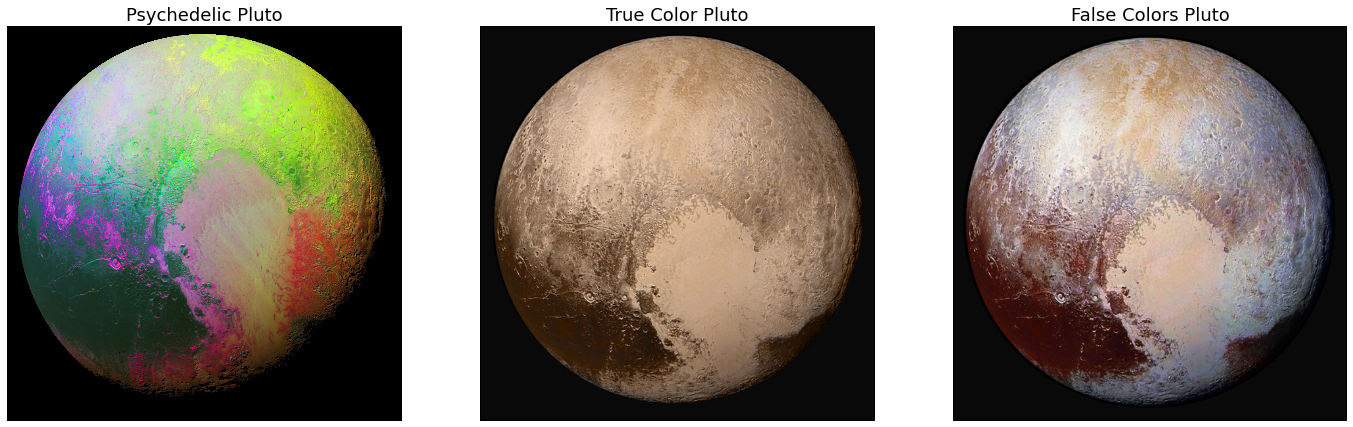

In [4]:
fig = plt.figure(figsize = (24,24))
ax1 = fig.add_subplot(1,3,1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Psychedelic Pluto', fontsize=18)
plt.imshow(ps)

ax2 = fig.add_subplot(1,3,2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('True Color Pluto', fontsize=18)
plt.imshow(tc)

ax3 = fig.add_subplot(1,3,3)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('False Colors Pluto', fontsize=18)
plt.imshow(fc)

plt.show()

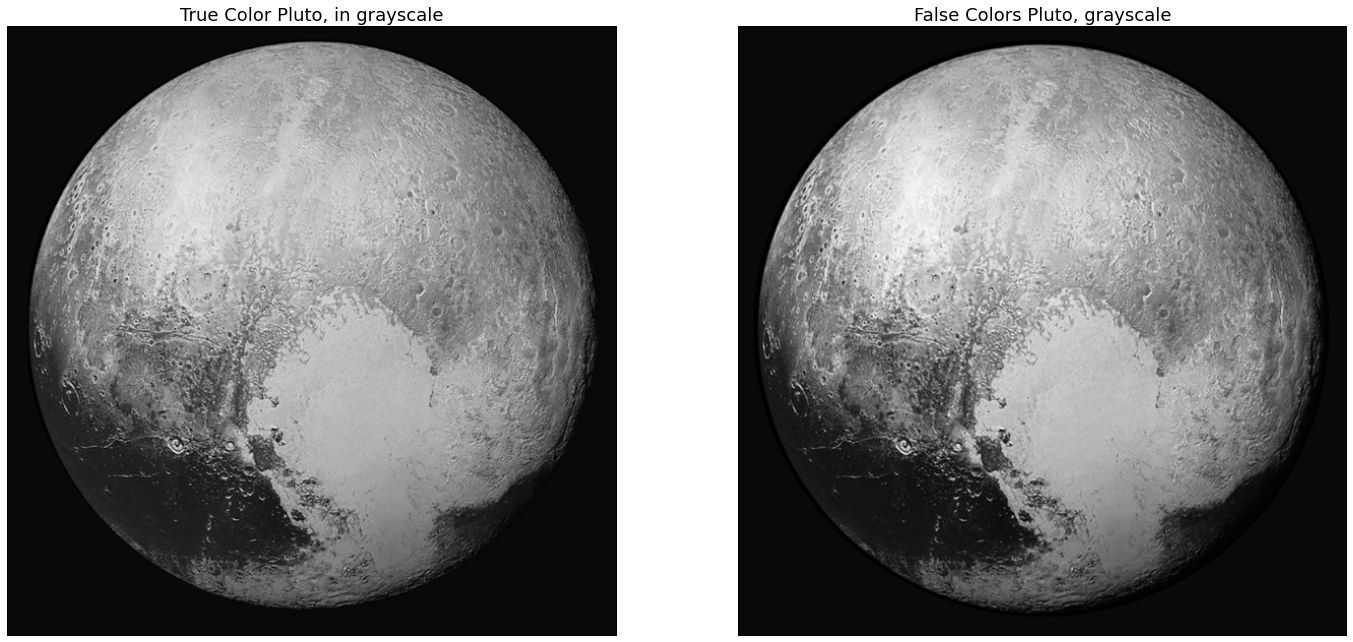

In [5]:
fig = plt.figure(figsize = (24,24))
ax2 = fig.add_subplot(1,2,1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('True Color Pluto, in grayscale', fontsize=18)
plt.imshow(color.rgb2gray(tc), cmap = 'gray')

ax3 = fig.add_subplot(1,2,2)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('False Colors Pluto, grayscale', fontsize=18)
plt.imshow(color.rgb2gray(fc), cmap = 'gray')

plt.show()

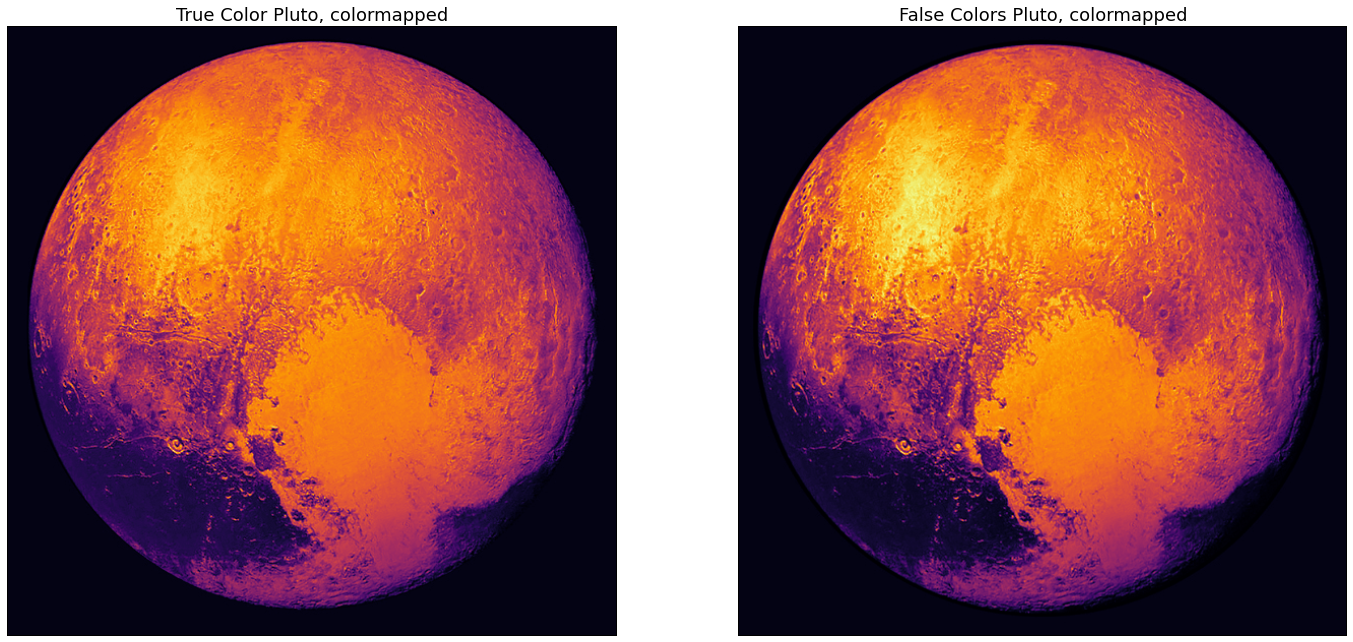

In [6]:
fig = plt.figure(figsize = (24,24))

ax2 = fig.add_subplot(1,2,1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('True Color Pluto, colormapped', fontsize=18)
plt.imshow(color.rgb2gray(tc), cmap = inferno)

ax3 = fig.add_subplot(1,2,2)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('False Colors Pluto, colormapped', fontsize=18)
plt.imshow(color.rgb2gray(fc), cmap = inferno)

plt.show()

#### PCA OF THE TRUE COLOR PLUTO IMAGE

In [7]:
# rearranging data so as to have 3 1D vectors of R, G, B color components
print tc.shape
vectors = tc.reshape(360000, 3)
print vectors.shape

(600, 600, 3)
(360000, 3)


In [8]:
pca = decomposition.PCA()
pca.fit(vectors)

np.set_printoptions(suppress=True)
print (pca.explained_variance_)

[ 14150.66126669     66.98057798      0.7068626 ]


##### It looks like the 1st component explains most of the variance, so let's get it

In [9]:
pca.n_components = 1
vectors_reduced = pca.fit_transform(vectors)
print vectors_reduced.shape

comp1 = vectors_reduced.reshape(600, 600)
print comp1.shape

(360000, 1)
(600, 600)


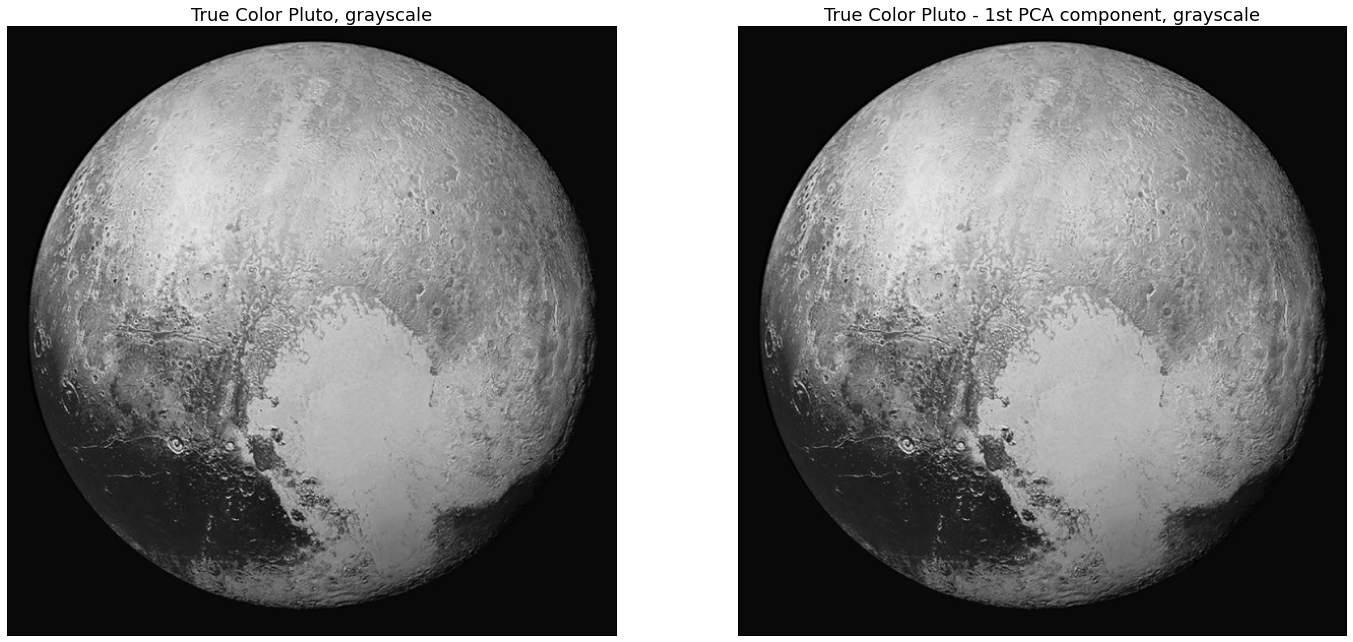

In [10]:
fig = plt.figure(figsize = (24,24))

ax1 = fig.add_subplot(1,2,1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('True Color Pluto, grayscale', fontsize=18)
plt.imshow(color.rgb2gray(tc), cmap = 'gray')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('True Color Pluto - 1st PCA component, grayscale', fontsize=18)
plt.imshow(vectors_reduced.reshape(600, 600), origin = 'upper', cmap = 'gray')

plt.show()

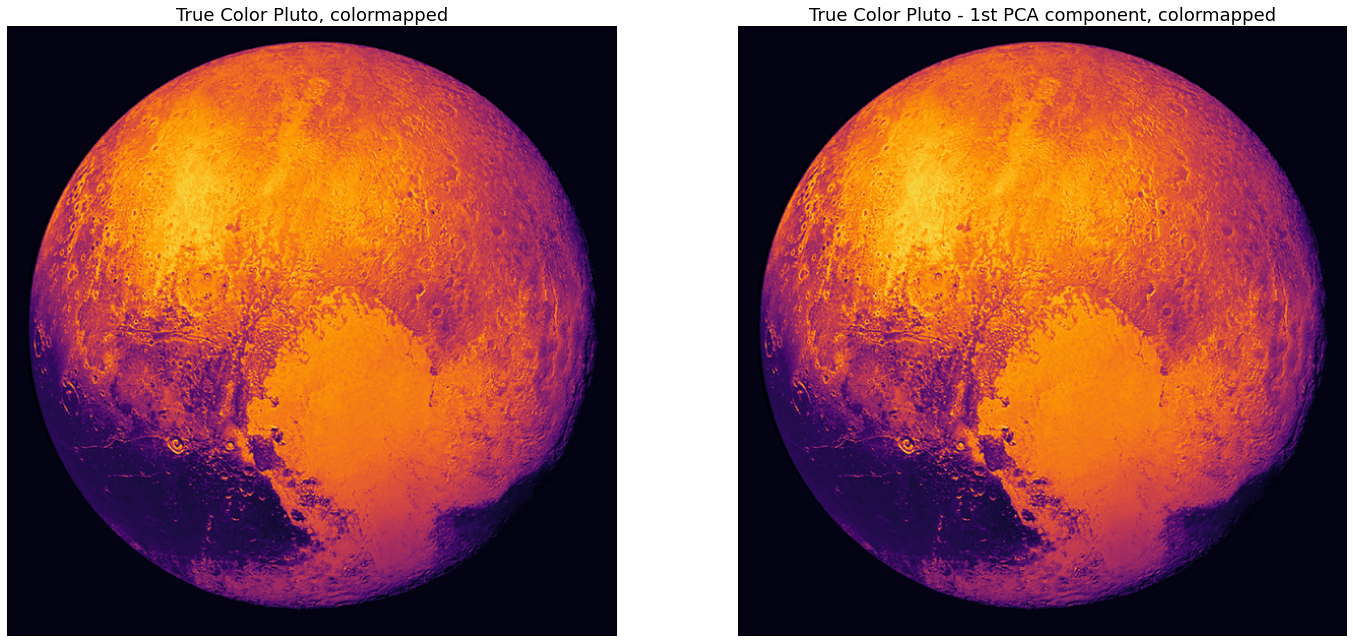

In [11]:
fig = plt.figure(figsize = (24,24))

ax1 = fig.add_subplot(1,2,1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('True Color Pluto, colormapped', fontsize=18)
plt.imshow(color.rgb2gray(tc), cmap = inferno)

ax2 = fig.add_subplot(1,2,2)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('True Color Pluto - 1st PCA component, colormapped', fontsize=18)
plt.imshow(vectors_reduced.reshape(600, 600), origin = 'upper', cmap = inferno)

plt.show()

#### COMMENTS

OK, first principal component of an image is good for compression, as shown by the comparison in the cell below. That's old news (but for me it's the first time doing it so I'm quite pleased anyway).

In [12]:
print tc.size
print comp1.size

1080000
360000


However, in terms of making an 'enhanced'image via PCA to bring out more subtle detail from coloration in Puto's surface images, I don't get it!

The 1st component from PCA of the True Colour image looks identical to the original image, but it won't magically create more details from it.

One could do PCA on the False Colors image, which seems to have more detail, then use the 1st component. But what's the point? You'd get the same result by just colormapping the False Colors image! And, besides, it'd be cheating. The enhancement would come from the process that created the false color image in the first place.

If I look at the description of the False Colors image: https://www.nasa.gov/image-feature/the-rich-color-variations-of-pluto  
it looks like they combined red, blue, and infrared.
I wonder if they run PCA using these three (and perhaps others), then blended the 1st component (or combination of first few successive components explaining the maximum variance) as a color overlay for the True Color image - or simply colored the 1st component.

A different approach could be to try clustering on the colors, and set the number of clusters to, say, 12 or 24, to find the most representative colors, then use the clusters as a color overlay, blended with the original image set to grayscale. I tried this approach (different notebook) starting from this example:

http://localhost:8888/notebooks/Pythonwork/AstroPy/Unsupervised%20imagery%20classification.ipynb

but it is very time consuming, results don't look that great with either method, and the problem I'm stuck with is, how do you rearrange the clusters so that nearby clusters change color gradually?